# Diabetics Prediction

1. What is the busniess question?
- With 8 explanatory variables describing aspects of a person's health, we want to predict whether this person is diabetic or not.
2. What does each row repesent?
- a person


## 1- Important imports

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

# Data understanding libraries
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# data preparation
import re

# Logistic regression 
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV


## 2- Loading Data

In [2]:
df = pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3- Data Understanding

### 3.1 dataframe structue

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
print('There is', df.shape[0], 'rows and', df.shape[1], 'columns.')

There is 768 rows and 9 columns.


- There is 768 records.
- There is no null values

### 3.2 Data Visulalization

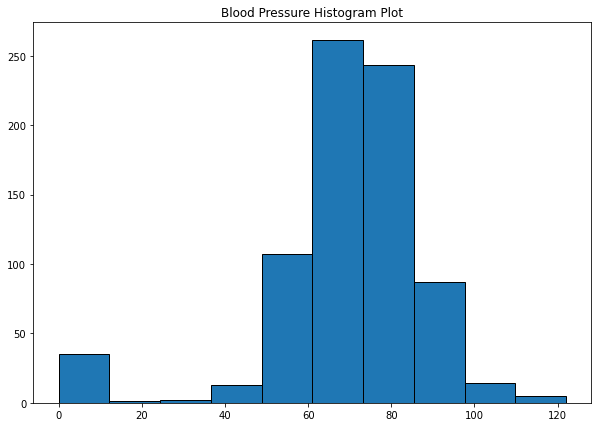

In [7]:
plt.figure(figsize=(10,7))
plt.hist('BloodPressure', data=df, edgecolor='k')
plt.title('Blood Pressure Histogram Plot')
plt.show()

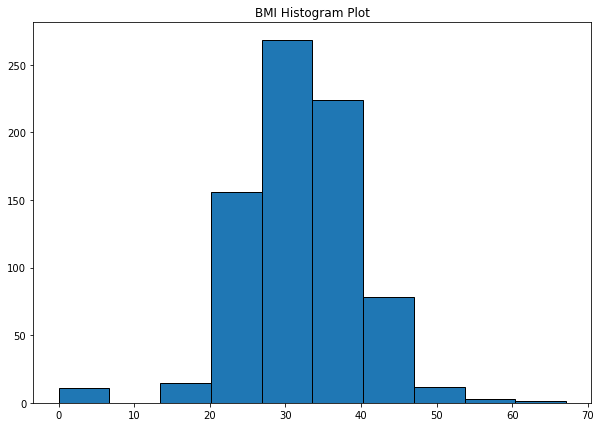

In [8]:
plt.figure(figsize=(10,7))
plt.hist('BMI', data=df, edgecolor='k')
plt.title('BMI Histogram Plot')
plt.show()

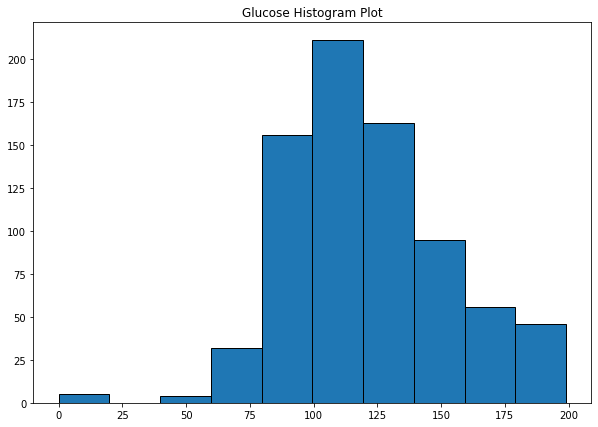

In [9]:
plt.figure(figsize=(10,7))
plt.hist('Glucose', data=df, edgecolor='k')
plt.title('Glucose Histogram Plot')
plt.show()

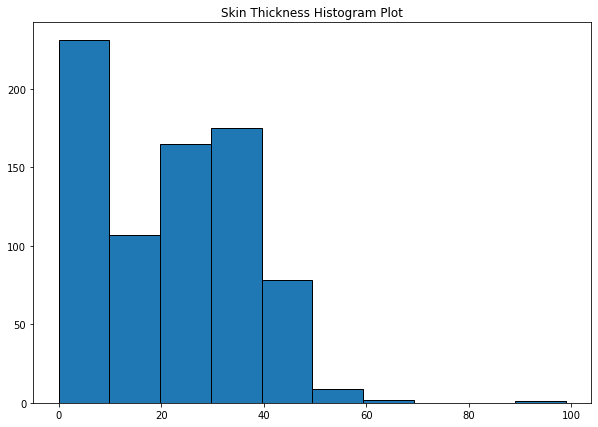

In [10]:
plt.figure(figsize=(10,7))
plt.hist('SkinThickness', data=df, edgecolor='k')
plt.title('Skin Thickness Histogram Plot')
plt.show()

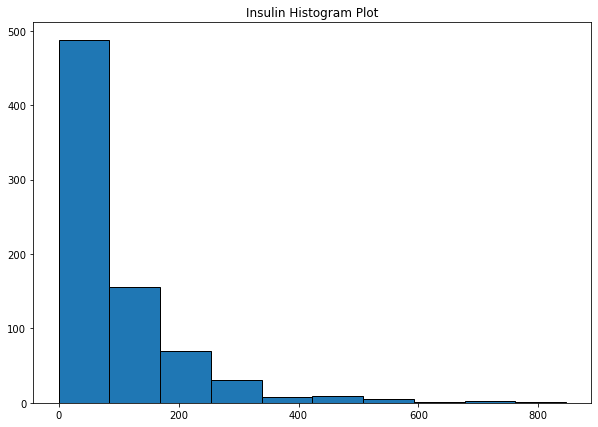

In [11]:
plt.figure(figsize=(10,7))
plt.hist('Insulin', data=df, edgecolor='k')
plt.title('Insulin Histogram Plot')
plt.show()

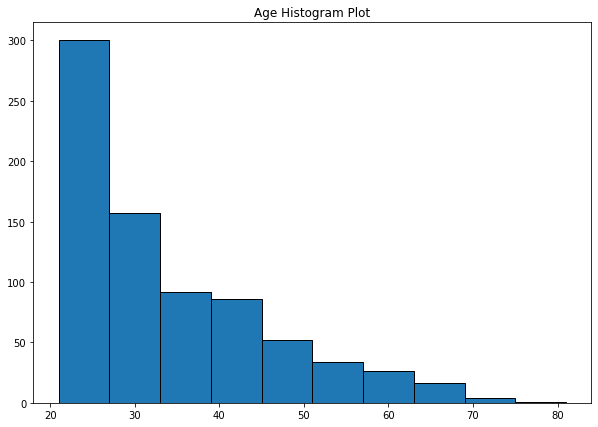

In [12]:
plt.figure(figsize=(10,7))
plt.hist('Age', data=df, edgecolor='k')
plt.title('Age Histogram Plot')
plt.show()

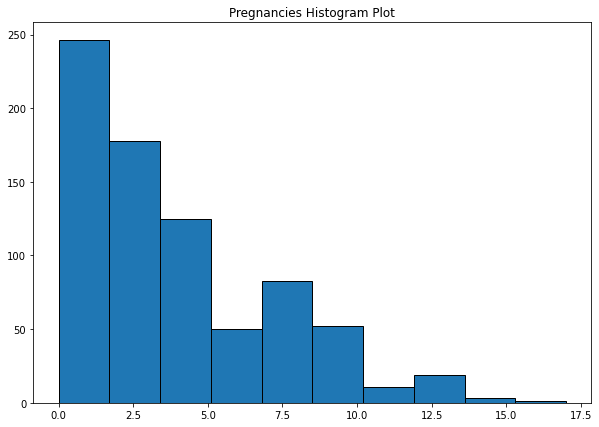

In [13]:
plt.figure(figsize=(10,7))
plt.hist('Pregnancies', data=df, edgecolor='k')
plt.title('Pregnancies Histogram Plot')
plt.show()

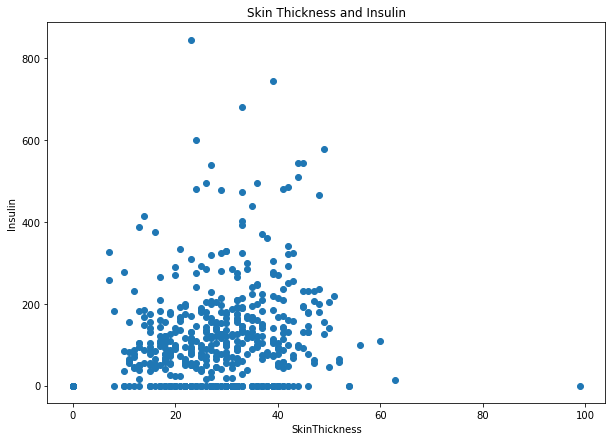

In [14]:
plt.figure(figsize=(10,7))
plt.scatter('SkinThickness', 'Insulin', data=df)
plt.title('Skin Thickness and Insulin')
plt.xlabel('SkinThickness')
plt.ylabel('Insulin')
plt.show()

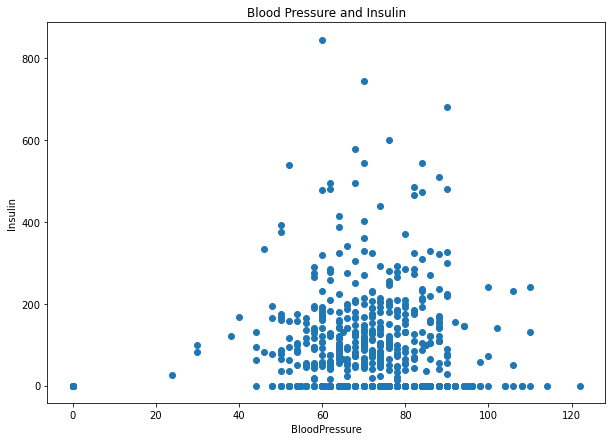

In [15]:
plt.figure(figsize=(10,7))
plt.scatter('BloodPressure', 'Insulin', data=df)
plt.title('Blood Pressure and Insulin')
plt.xlabel('BloodPressure')
plt.ylabel('Insulin')
plt.show()

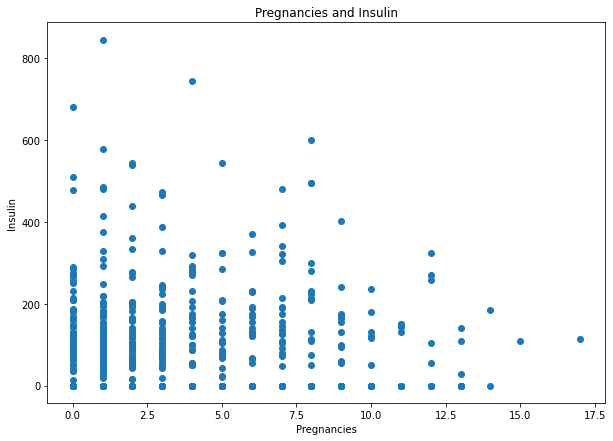

In [16]:
plt.figure(figsize=(10,7))
plt.scatter('Pregnancies', 'Insulin', data=df)
plt.title('Pregnancies and Insulin')
plt.xlabel('Pregnancies')
plt.ylabel('Insulin')
plt.show()

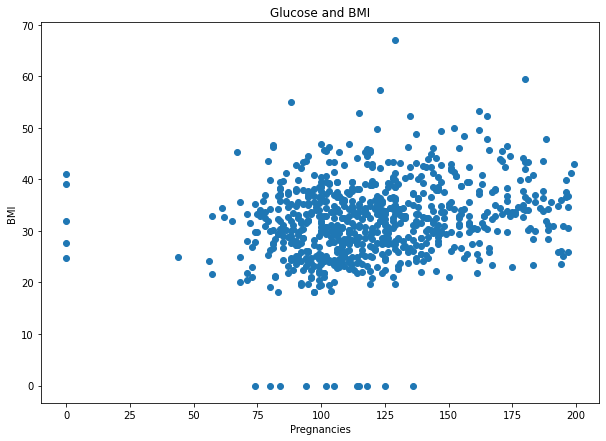

In [17]:
plt.figure(figsize=(10,7))
plt.scatter('Glucose', 'BMI', data=df)
plt.title('Glucose and BMI')
plt.xlabel('Pregnancies')
plt.ylabel('BMI')
plt.show()

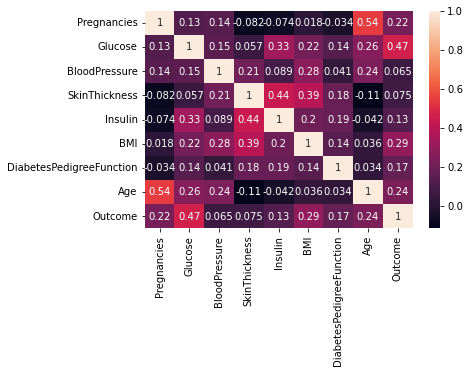

In [18]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## 4- Data Preparation

- We can note that there is no null values but there are zero values in the columns BloodPressure, Insulin, BMI, Glucose and SkinThickness. 

### 4.1 Removing Outlieres

In [19]:
def zerosCount(columns):
    for col in columns:
        cond = df[col] == 0
        print('The number of records with zero', col, 'is', len(df[cond]))
zerosCount(['Insulin', 'SkinThickness'])

The number of records with zero Insulin is 374
The number of records with zero SkinThickness is 227


In [20]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [21]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

In [22]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


### 4.2 Removing Outliers using Interquartile Range (IQR)

- **IQR = Q3 - Q1**

In [23]:
def removeOutlier(dataframe):
    for col in dataframe.columns:
        Q1 = df[col].quantile(0.25)   # the first quarter
        Q3 = df[col].quantile(0.75)   # the third quarter
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        print('The lower limit for', col, 'is', lower_limit, 'and the upper limit is', upper_limit)
        dataframe = dataframe[(dataframe[col] > lower_limit) | (dataframe[col] < upper_limit)]

    return dataframe

In [24]:
df = removeOutlier(df)

The lower limit for Pregnancies is -6.5 and the upper limit is 13.5
The lower limit for Glucose is 37.125 and the upper limit is 202.125
The lower limit for BloodPressure is 35.0 and the upper limit is 107.0
The lower limit for SkinThickness is 3.341145833333332 and the upper limit is 49.1953125
The lower limit for Insulin is 8.623697916666671 and the upper limit is 198.42578125
The lower limit for BMI is 13.35 and the upper limit is 50.550000000000004
The lower limit for DiabetesPedigreeFunction is -0.32999999999999996 and the upper limit is 1.2
The lower limit for Age is -1.5 and the upper limit is 66.5
The lower limit for Outcome is -1.5 and the upper limit is 2.5


In [25]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [26]:
print('The data frame has', df.shape[0], 'records and', df.shape[1], 'columns.') 

The data frame has 768 records and 9 columns.


### 4.3 Scalling

In [27]:
def scale(dataframe):
    for col in dataframe.columns:
        dataframe[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return dataframe


In [28]:
df = scale(df)

In [29]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.304348,0.079086,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.239130,0.079086,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.147135,0.079086,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.173913,0.096154,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.304348,0.185096,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.445652,0.199519,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.217391,0.079086,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.173913,0.117788,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.147135,0.079086,0.448584,0.115713,0.433333,1.0


### 4.4 Splitting the Data

In [30]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=110)
x_train.shape,y_train.shape

((460, 8), (460,))

In [31]:
x_test.shape,y_test.shape

((308, 8), (308,))

## 5- Modelling

In [32]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

#### Accuracy

In [33]:
clf.score(x_test,y_test)*100

77.92207792207793

## 6- Evaluation

In [34]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions)

<AxesSubplot:>

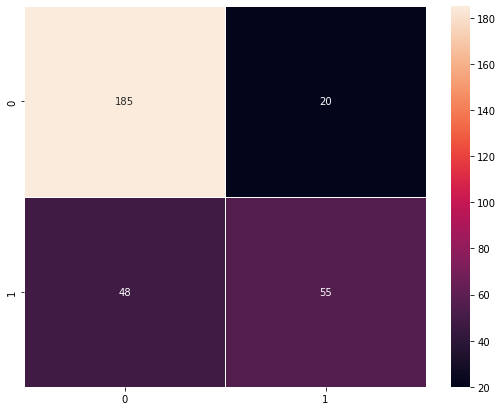

In [35]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, fmt='g')

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       205
         1.0       0.73      0.53      0.62       103

    accuracy                           0.78       308
   macro avg       0.76      0.72      0.73       308
weighted avg       0.77      0.78      0.77       308

